In [1]:
import stim
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt

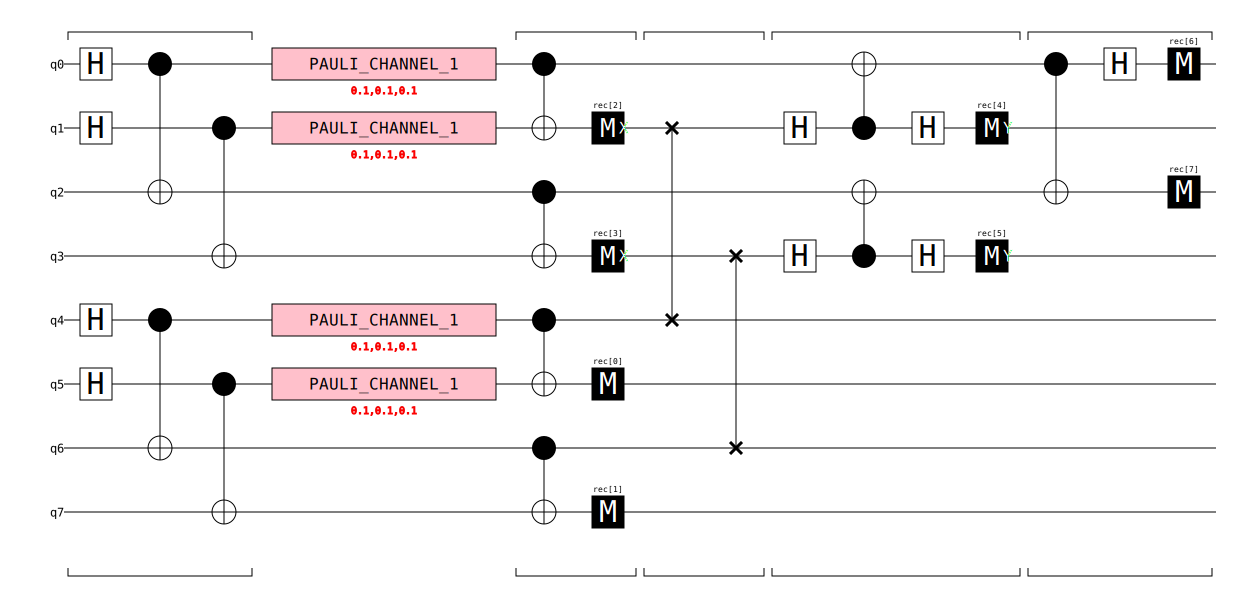

raw: success count (3587108), no err 2817094, with err 770014
success probability = 0.3587108
fidelity = 0.7853384955234133


In [2]:
def get_takafumi_experiment_samples(px, py, pz, num_shots, show_circuit=False):
    old_circuit_string = f"""
    H 0 1 4 5
    CNOT 0 2 4 6 1 3 5 7
    TICK
    PAULI_CHANNEL_1({px}, {py}, {pz}) 0 1 4 5
    TICK
    CNOT 0 1 2 3 4 5 6 7
    MZ 5 7
    MX 1 3
    TICK
    SWAP 1 4 3 6
    TICK
    H 1 3
    CNOT 1 0 3 2
    H 1 3
    MY 1 3
    TICK
    CNOT 0 2
    H 0
    MZ 0 2
    """

    circuit = stim.Circuit(old_circuit_string)
    sampler = circuit.compile_sampler()
    result = sampler.sample(shots=num_shots)
    if show_circuit:
        display(circuit.diagram('timeline-svg'))

    parr = np.einsum('ij->ji', result)
    zz_arr = ~(parr[0] ^ parr[1])
    xx_arr = ~(parr[2] ^ parr[3])
    yy_arr = (parr[4] ^ parr[5])
    is_phi_plus = (~parr[6]) & (~parr[7])
    joint_success_arr = zz_arr & xx_arr & yy_arr

    return zz_arr, xx_arr, yy_arr, joint_success_arr, is_phi_plus

shots = 10
shots = 10_000_000
_, _, _, succs, phi_plus_arr = get_takafumi_experiment_samples(0.1, 0.1, 0.1, shots, show_circuit=True)

no_err = 0
with_err = 0

for s, p in zip(succs, phi_plus_arr):
    if not s:
        continue
    if p:
        no_err += 1
    else:
        with_err += 1

print(f'raw: success count ({no_err + with_err}), no err {no_err}, with err {with_err}')
print(f'success probability = {(no_err + with_err) / shots}')
print(f'fidelity = {no_err / (no_err + with_err)}')

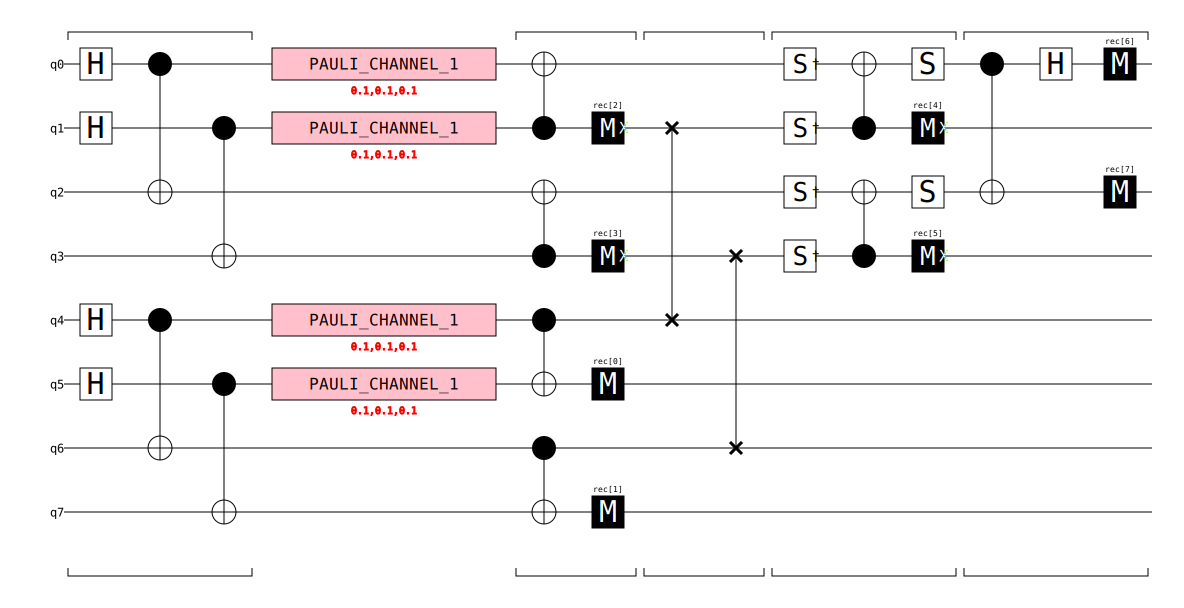

raw: success count (2960479), no err 2504238, with err 456241
success probability = 0.2960479
fidelity = 0.8458894658600855


In [3]:
def get_naphan_experiment_samples(px, py, pz, num_shots, show_circuit=False):
    old_circuit_string = f"""
    H 0 1 4 5
    CNOT 0 2 4 6 1 3 5 7
    TICK
    PAULI_CHANNEL_1({px}, {py}, {pz}) 0 1 4 5
    TICK
    CNOT 1 0 3 2 4 5 6 7
    MZ 5 7
    MX 1 3
    TICK
    SWAP 1 4 3 6
    TICK
    S_DAG 0 1 2 3
    CNOT 1 0 3 2
    MX 1 3
    S 0 2
    TICK
    CNOT 0 2
    H 0
    MZ 0 2
    """

    circuit = stim.Circuit(old_circuit_string)
    sampler = circuit.compile_sampler()
    result = sampler.sample(shots=num_shots)
    if show_circuit:
        display(circuit.diagram('timeline-svg'))

    parr = np.einsum('ij->ji', result)
    zz_arr = ~(parr[0] ^ parr[1])
    xx_arr = ~(parr[2] ^ parr[3])
    yy_arr = ~(parr[4] ^ parr[5])
    is_phi_plus = (~parr[6]) & (~parr[7])
    joint_success_arr = zz_arr & xx_arr & yy_arr

    return zz_arr, xx_arr, yy_arr, joint_success_arr, is_phi_plus

shots = 10
shots = 10_000_000
_, _, _, succs, phi_plus_arr = get_naphan_experiment_samples(0.1, 0.1, 0.1, shots, show_circuit=True)

no_err = 0
with_err = 0

for s, p in zip(succs, phi_plus_arr):
    if not s:
        continue
    if p:
        no_err += 1
    else:
        with_err += 1

print(f'raw: success count ({no_err + with_err}), no err {no_err}, with err {with_err}')
print(f'success probability = {(no_err + with_err) / shots}')
print(f'fidelity = {no_err / (no_err + with_err)}')